# identify null values


In [ ]:
import pandas as pd 
import numpy as np
df1=pd.DataFrame({'A':[1,np.nan,np.nan,np.nan],'B':[2,5,8,np.nan],'C':[3,6,np.nan,np.nan]})
df1

In [4]:
df1.isna()

,A,B,C
0,False,False,False
1,True,False,False
2,True,False,True
3,True,True,True


In [ ]:
#check total null values per column

In [5]:
df1.isna().sum()

A    3
B    1
C    2
dtype: int64

In [6]:
#check percentage of null values per column

In [7]:
df1.isna().sum()/len(df1)*100

A    75.0
B    25.0
C    50.0
dtype: float64

In [9]:
#count given non null value count
df1.count()

A    1
B    3
C    2
dtype: int64

# Delete the rows with missing values

In [11]:
df1

,A,B,C
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,NaN,8.0,NaN
3,NaN,NaN,NaN


In [13]:
df1.dropna(how='any')

,A,B,C
0,1.0,2.0,3.0


In [15]:
df1.dropna(how='all')

,A,B,C
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,NaN,8.0,NaN


In [17]:
df1

,A,B,C
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,NaN,8.0,NaN
3,NaN,NaN,NaN


In [20]:
df1.dropna(axis=0,thresh=1)

,A,B,C
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,NaN,8.0,NaN


In [21]:
df1.dropna(axis=0,thresh=2)

,A,B,C
0,1.0,2.0,3.0
1,NaN,5.0,6.0


In [22]:
df1.dropna(axis=0,thresh=3)

,A,B,C
0,1.0,2.0,3.0


### impute the missing values(fillna)

# 1.fill null values with mean and median

In [23]:
df1=pd.DataFrame({'A':["yes","yes","no",np.nan,"yes"],'B':[2,5,8,np.nan,9],'C':[3,6,np.nan,np.nan,np.nan]})
df1

,A,B,C
0,yes,2.0,3.0
1,yes,5.0,6.0
2,no,8.0,NaN
3,NaN,NaN,NaN
4,yes,9.0,NaN


In [24]:
df1['B'].mean()

6.0

In [25]:
df1['B'].fillna(df1['B'].mean())

0    2.0
1    5.0
2    8.0
3    6.0
4    9.0
Name: B, dtype: float64

In [26]:
df1['B'].fillna(df1['B'].median())

0    2.0
1    5.0
2    8.0
3    6.5
4    9.0
Name: B, dtype: float64

# 2.fill null values with mode

In [27]:
df1=pd.DataFrame({'A':["yes","yes","no",np.nan,"yes"],'B':[2,5,8,np.nan,9],'C':[3,6,np.nan,np.nan,np.nan]})
df1

,A,B,C
0,yes,2.0,3.0
1,yes,5.0,6.0
2,no,8.0,NaN
3,NaN,NaN,NaN
4,yes,9.0,NaN


In [31]:
df1["A"].mode()

0    yes
Name: A, dtype: object

In [35]:
df1["A"].fillna(df1["A"].mode()[0],inplace=True)

In [36]:
df1

,A,B,C
0,yes,2.0,3.0
1,yes,5.0,6.0
2,no,8.0,NaN
3,yes,NaN,NaN
4,yes,9.0,NaN


# 3.Forward Fill

In [38]:
df1=pd.DataFrame({'A':["yes","yes","no",np.nan,"yes"],'B':[2,5,8,np.nan,9],'C':[3,6,np.nan,np.nan,np.nan]})
df1

,A,B,C
0,yes,2.0,3.0
1,yes,5.0,6.0
2,no,8.0,NaN
3,NaN,NaN,NaN
4,yes,9.0,NaN


In [39]:
df1.fillna(method='ffill')

,A,B,C
0,yes,2.0,3.0
1,yes,5.0,6.0
2,no,8.0,6.0
3,no,8.0,6.0
4,yes,9.0,6.0


In [40]:
df1.fillna(method='bfill')

,A,B,C
0,yes,2.0,3.0
1,yes,5.0,6.0
2,no,8.0,NaN
3,yes,9.0,NaN
4,yes,9.0,NaN


# Handling Outliers

# 1.Box-Plot

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
df2=sns.load_dataset('tips')
df2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [46]:
df2.shape

(244, 7)

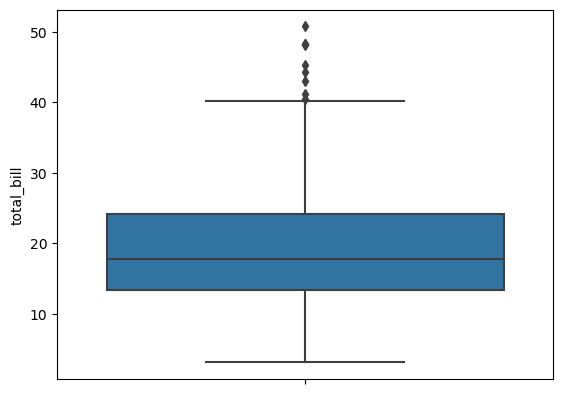

In [52]:
sns.boxplot(y=df2["total_bill"])
plt.show()

# 2.IQR Method

In [49]:
Q1=df2['total_bill'].quantile(0.25)
Q3=df2['total_bill'].quantile(0.75)
IQR=Q3-Q1
IQR

10.779999999999998

In [50]:
Q1-1.5*IQR

-2.8224999999999945

In [51]:
Q3+1.5*IQR

40.29749999999999

In [62]:
df3=df2[df2['total_bill']>40.29]
df3

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
142,41.19,5.00,Male,No,Thur,Lunch,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
184,40.55,3.00,Male,Yes,Sun,Dinner,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4
212,48.33,9.00,Male,No,Sat,Dinner,4


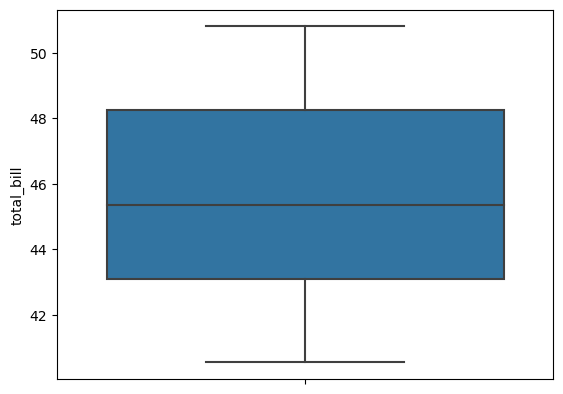

In [63]:
sns.boxplot(y=df3["total_bill"])
plt.show()

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <BarContainer object of 10 artists>)

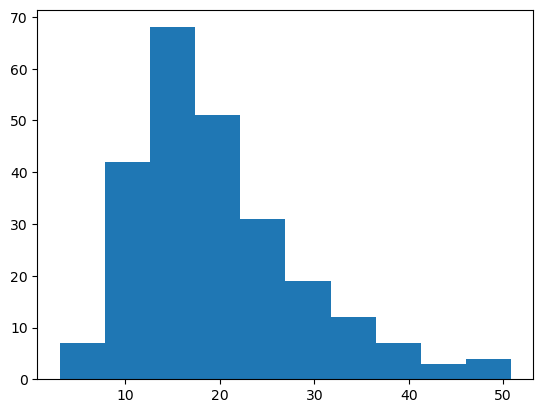

In [64]:
plt.hist(df2["total_bill"])

# 3.z score

In [66]:
df2=sns.load_dataset("tips")
df2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [67]:
df2.shape

(244, 7)

In [68]:
from scipy.stats import zscore
df2["z score"]=zscore(df2["total_bill"])
df2.head()

,total_bill,tip,sex,smoker,day,time,size,z score
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745


In [72]:
df2[df2["z score"]>3]

,total_bill,tip,sex,smoker,day,time,size,z score
59,48.27,6.73,Male,No,Sat,Dinner,4,3.206166
156,48.17,5.00,Male,No,Sun,Dinner,6,3.194910
170,50.81,10.00,Male,Yes,Sat,Dinner,3,3.492068
212,48.33,9.00,Male,No,Sat,Dinner,4,3.212919
